* Implementation of Log Transformation , Gamma Transformation, Binarization, Negative Image.


* Different types of filtering in python:
** Average Filtering
** Mean Filtering
** Gaussian Filtering
** Median Filtering

In [ ]:
#import libraries
import cv2                       #Image Processing
import numpy as np               #Maths
import math
import matplotlib.pyplot as plt  # matplotlib work like MATLAB

In [ ]:
def read_img(image_path):
    # reads image
    image = cv2.imread(image_path,0)

    return image

In [ ]:
# log transformation
"""Log transformation function is s = c * log(1+r)
 where s is output and r is input pixel values
 Expands dark pixels and compresses bright pixels"""

def log_transformation(image_path, scaling_constant):
    image = read_img(image_path)
    new_img = np.zeros((image.shape[0], image.shape[1]))   # column and rows

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            new_img[i,j] = scaling_constant * math.log(1 + image[i,j])   # using log transformation formula

    return new_img   # returns new image



In [ ]:
#gamma Transformation
"""
 Gamma correction is used to manipulate brightness
 Transformation function is s = c * r ^ gamma
 Args:

 image_path: path to image that will be transformed
 gamma: constant used for correction, <1 results to brighter
images
 and >1 results to darker images
 Returns:
 Image
 """
def gamma_transformation(image_path, scaling_constant, gamma):

    image = read_img(image_path)
    corrected_img = np.zeros((image.shape[0], image.shape[1]))

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            corrected_img[i,j] = scaling_constant * image[i,j]**gamma

    return corrected_img

In [ ]:
def image_binarize(image_path, threshold):

"""Image binarization (piecewise linear transformation)
 Image binarization is conversion of document image into bi-level.
 Args:
 image_path: path to image that will be transformed
 threshold: pixel value threshold as int (will be converted to
list for
 non-monotonic transformation)
 Returns:
 Image
 """
    image = read_img(image_path)
    binarized_img = np.zeros((image.shape[0], image.shape[1]))

    for i in range(image.shape[0]):
      # if pixel > threshold then = 255
      # else less than 127 then = 0
        for j in range(image.shape[1]):

            if image[i,j] < threshold:

                binarized_img[i,j] = 0

            else:

                binarized_img[i,j] = 225

    return binarized_img


In [ ]:
def image_negative(image_path):
# negative image
    image = read_img(image_path)
    neg = np.zeros((image.shape[0], image.shape[1]))

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            neg[i,j] = 255-image[i,j]

    return neg


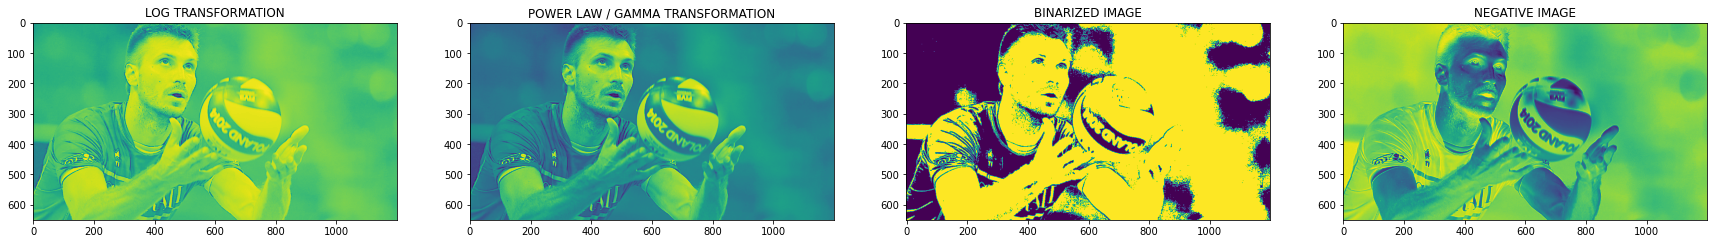

In [ ]:
# displaying the images
plt.figure(figsize=(30,30))
plt.subplot(1,4,1)
plt.title("LOG TRANSFORMATION")
plt.imshow(log_transformation("/content/cameraman.tif", 50))
plt.subplot(1,4,2)
plt.title("POWER LAW / GAMMA TRANSFORMATION")
plt.imshow(gamma_transformation("/content/cameraman.tif",50,0.5))
plt.subplot(1,4,3)
plt.title("BINARIZED IMAGE")
plt.imshow(image_binarize("/content/cameraman.tif",50))
plt.subplot(1,4,4)
plt.title("NEGATIVE IMAGE")
plt.imshow(image_negative("/content/cameraman.tif"))


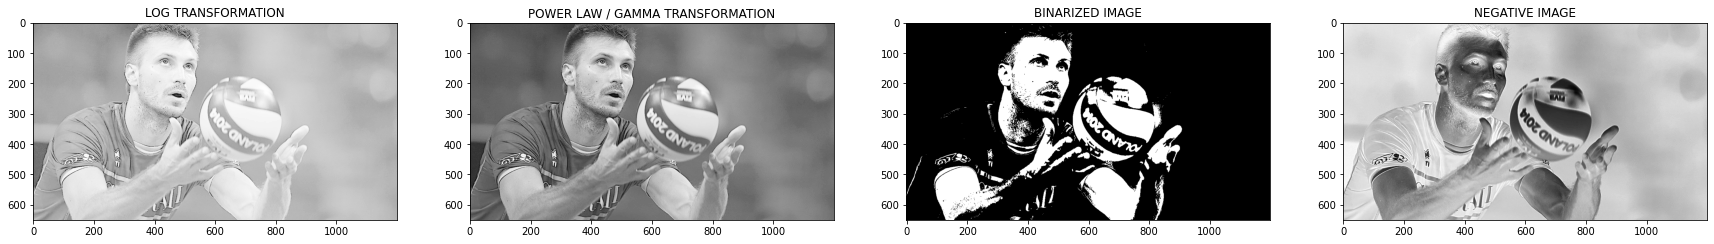

In [ ]:
# displaying the images in grayscale
plt.figure(figsize=(30,30))
plt.subplot(1,4,1)
plt.title("LOG TRANSFORMATION")
plt.imshow(log_transformation("/content/cameraman.tif", 50),cmap='gray')
plt.subplot(1,4,2)
plt.title("POWER LAW / GAMMA TRANSFORMATION")
plt.imshow(gamma_transformation("/content/cameraman.tif",50,0.5),cmap='gray')
plt.subplot(1,4,3)
plt.title("BINARIZED IMAGE")
plt.imshow(image_binarize("/content/cameraman.tif",100),cmap='gray')
plt.subplot(1,4,4)
plt.title("NEGATIVE IMAGE")
plt.imshow(image_negative("/content/cameraman.tif"),cmap='gray')


##Averaging
Averaging uses a square sliding window to average the values of the pixels. The window is centered over a pixel, then all pixels within the window are summed up and divided by the area of the window (e.g. a 3x3 window will be divided by 9). The larger the window, the blurrier the image.

In [ ]:
# read image
img = cv2.imread("/content/cameraman.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

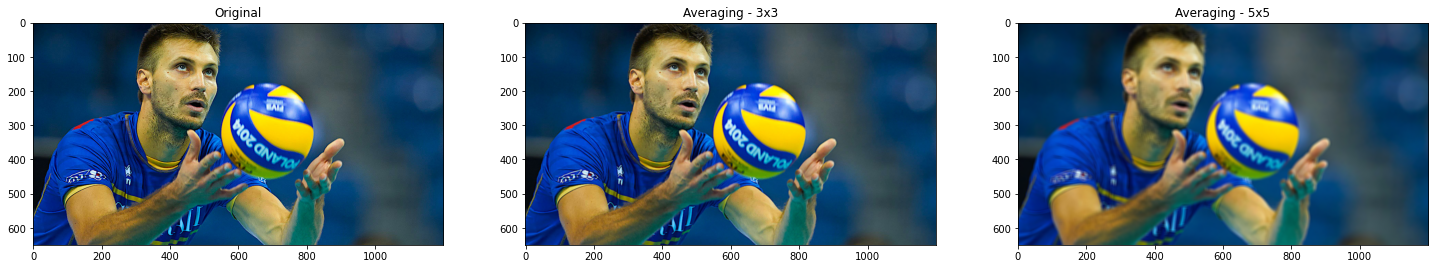

In [ ]:
av3 = cv2.blur(img,(3,3))    # method is used to blur an image using the normalized box filter.
av5 = cv2.blur(img,(5,5))
# Plot the image.
plt.figure(figsize=(25,25))
plt.subplot(131),plt.imshow(img),plt.title('Original')

plt.subplot(132),plt.imshow(av3),plt.title('Averaging - 3x3')

plt.subplot(133),plt.imshow(av5),plt.title('Averaging - 5x5')

plt.show()

# Mean Filtering

The mean filter is used to blur an image in order to remove noise. It involves determining the mean of the pixel values within a n x n kernel. The pixel intensity of the center element is then replaced by the mean. This eliminates some of the noise in the image and smooths the edges of the image.

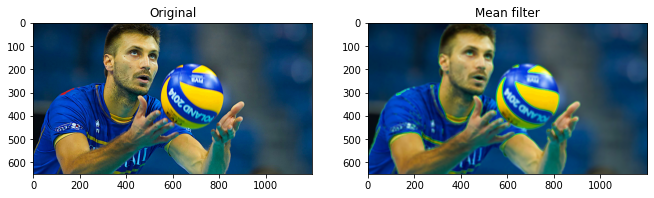

In [ ]:
image = cv2.imread('/content/mean.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernel.
mean_image = cv2.blur(image,(figure_size, figure_size))
#The median filter does a better job of removing salt and pepper
#noise than the mean and Gaussian filters.
#CV2.medianBlur is the function used to apply median filter
# Plot the image.
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')

plt.subplot(122), plt.imshow(cv2.cvtColor(mean_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')

plt.show()

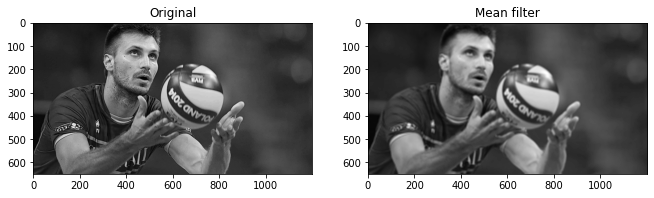

In [ ]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
mean_image = cv2.blur(image2,(figure_size, figure_size))
# Plot the image.
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')

plt.subplot(122), plt.imshow(mean_image, cmap='gray'),plt.title('Mean filter')

plt.show()

# Gaussian Filtering

The Gaussian Filter is similar to the mean filter however it involves a weighted average of the surrounding pixels and has a parameter sigma. The kernel represents a discrete approximation of a Gaussian distribution. While the Gaussian filter blurs the edges of an image (like the mean filter) it does a better job of preserving edges than a similarly sized mean filter

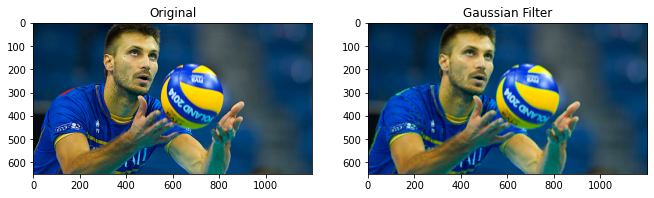

In [ ]:
gauss_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)       #CV2.GaussianBlur is the function used to apply Gaussian filter

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')

plt.subplot(122), plt.imshow(cv2.cvtColor(gauss_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')

plt.show()

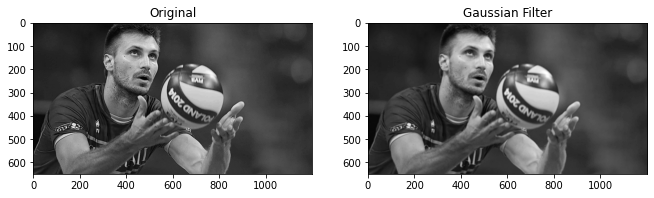

In [ ]:
# The image will first be converted to grayscale
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)

#To display the images
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.show()

# Median Filtering

The median filter calculates the median of the pixel intensities that surround the center pixel in a n x n kernel. The median then replaces the pixel intensity of the center pixel. The median filter does a better job of removing salt and pepper noise than the mean and Gaussian filters. The median filter preserves the edges of an image but it does not deal with speckle noise.

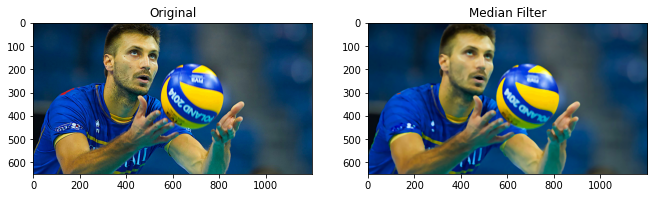

In [ ]:
# The median filter does a better job of removing salt and pepper noise than the mean and Gaussian filters.
median_image = cv2.medianBlur(image, figure_size)              #CV2.medianBlur is the function used to apply median filter

#To display Original and output image
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')

plt.subplot(122), plt.imshow(cv2.cvtColor(median_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')

plt.show()

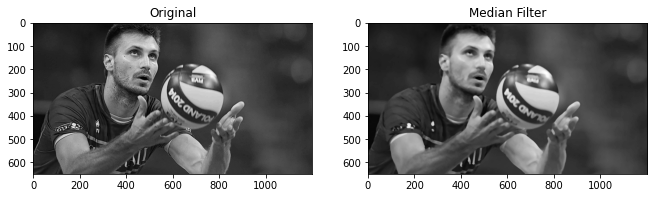

In [ ]:
# Displaying image in greyscale
median_image = cv2.medianBlur(image2, figure_size)
#To display Original and output image
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(median_image, cmap='gray'),plt.title('Median Filter')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb4b89f4310>,
 Text(0.5, 1.0, 'Median Filter'))

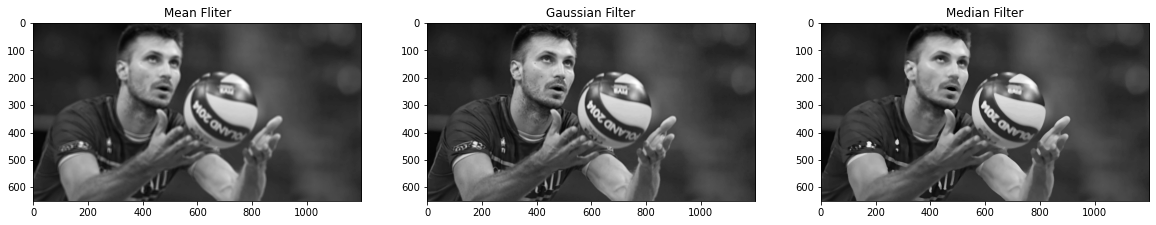

In [ ]:
#Comparing MEan, Gussian and Median filter
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(mean_image, cmap='gray'),plt.title('Mean Fliter')                #Mean Filter Image

plt.subplot(132),plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')       #Gussian Filter Image

plt.subplot(133),plt.imshow(median_image, cmap='gray'),plt.title('Median Filter')            #Median Filter Image
